In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import cudf
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth

In [2]:
## Read data
transaction_data = cudf.read_csv('../input/h-and-m-personalized-fashion-recommendations/transactions_train.csv')
transaction_data['customer_id'] = transaction_data['customer_id'].str[-16:].str.hex_to_int().astype('int64')
transaction_data['article_id'] = transaction_data.article_id.astype('int32')
transaction_data.t_dat = cudf.to_datetime(transaction_data.t_dat)
transaction_data = transaction_data[['t_dat','customer_id','article_id', 'price']]
print( transaction_data.shape )
transaction_data.head()

(31788324, 4)


,t_dat,customer_id,article_id,price
0,2018-09-20,-6846340800584936,663713001,0.050831
1,2018-09-20,-6846340800584936,541518023,0.030492
2,2018-09-20,-8334631767138808638,505221004,0.015237
3,2018-09-20,-8334631767138808638,685687003,0.016932
4,2018-09-20,-8334631767138808638,685687004,0.016932


In [3]:
## Data preprocess
transaction_data.loc[:,'t_dat'] = cudf.to_datetime(transaction_data['t_dat'])
transaction_data.loc[:, 'year'] = transaction_data['t_dat'].dt.year
transaction_data.loc[:, 'month'] = transaction_data['t_dat'].dt.month
transaction_data.loc[:, 'day'] = transaction_data['t_dat'].dt.day
transaction_data.head()

,t_dat,customer_id,article_id,price,year,month,day
0,2018-09-20,-6846340800584936,663713001,0.050831,2018,9,20
1,2018-09-20,-6846340800584936,541518023,0.030492,2018,9,20
2,2018-09-20,-8334631767138808638,505221004,0.015237,2018,9,20
3,2018-09-20,-8334631767138808638,685687003,0.016932,2018,9,20
4,2018-09-20,-8334631767138808638,685687004,0.016932,2018,9,20


In [4]:
transaction_data.to_parquet('transaction_data_hm.pqt',index=False)

In [5]:
transaction_data = pd.read_parquet("./transaction_data_hm.pqt")

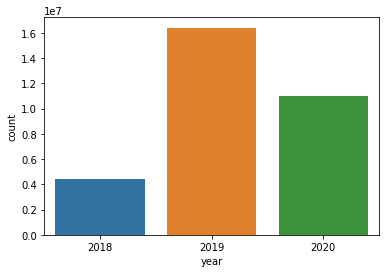

In [6]:
sns.countplot(x=transaction_data['year']);

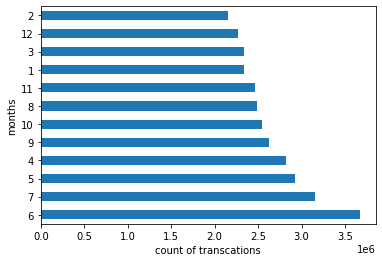

In [7]:
plt.xlabel("count of transactions")
plt.ylabel("months")
transaction_data.month.value_counts().plot(kind="barh");

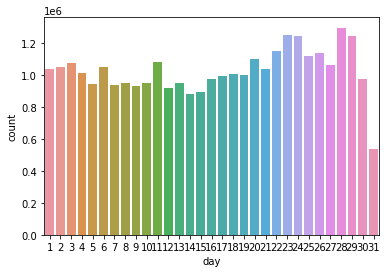

In [8]:
plt.ylabel("count of transactions")
plt.xlabel("days")
sns.countplot(x="day", data=transaction_data);

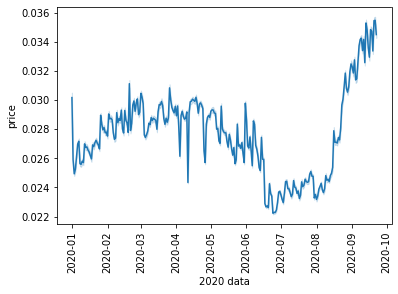

In [9]:
transactions_2020 =  transaction_data[transaction_data['year'] == 2020]
plt.xticks(rotation=90)
plt.xlabel("2020 data")
sns.lineplot(x="t_dat", y="price", data=transactions_2020);

In [10]:
transaction_2020 = transaction_data[transaction_data['year'] == 2020]

In [11]:
max(transaction_2020.price), min(transaction_2020.price)

(0.5067796610169492, 3.389830508474577e-05)

In [12]:
transactions_article_ids_value_counts = transaction_2020.article_id.value_counts()
transactions_article_ids_top_20 = transactions_article_ids_value_counts[:20].index.to_list()
articles_data = pd.read_csv("../input/h-and-m-personalized-fashion-recommendations/articles.csv", index_col = "article_id")
top_20_articles = articles_data.filter(items=transactions_article_ids_top_20, axis=0)
top_20_articles

,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
article_id,,,,,,,,,,,,,,,,,,,,,
706016001,706016,Jade HW Skinny Denim TRS,272,Trousers,Garment Lower body,1010016,Solid,9,Black,4,...,Trousers,D,Divided,2,Divided,53,Divided Collection,1009,Trousers,High-waisted jeans in washed superstretch deni...
610776002,610776,Tilly (1),255,T-shirt,Garment Upper body,1010016,Solid,9,Black,4,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,T-shirt in lightweight jersey with a rounded h...
751471001,751471,Pluto RW slacks (1),272,Trousers,Garment Lower body,1010016,Solid,9,Black,4,...,Trouser,A,Ladieswear,1,Ladieswear,15,Womens Everyday Collection,1009,Trousers,Ankle-length cigarette trousers in a stretch w...
759871002,759871,Tilda tank,253,Vest top,Garment Upper body,1010016,Solid,9,Black,4,...,EQ Divided Basics,D,Divided,2,Divided,80,Divided Complements Other,1002,Jersey Basic,"Cropped, fitted top in cotton jersey with narr..."
720125001,720125,SUPREME RW tights,273,Leggings/Tights,Garment Lower body,1010016,Solid,9,Black,4,...,Ladies Sport Bottoms,S,Sport,26,Sport,5,Ladies H&M Sport,1005,Jersey Fancy,Sports tights in fast-drying functional fabric...
372860001,372860,7p Basic Shaftless,302,Socks,Socks & Tights,1010016,Solid,9,Black,4,...,Shopbasket Socks,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,Fine-knit trainer socks in a soft cotton blend.
372860002,372860,7p Basic Shaftless,302,Socks,Socks & Tights,1010016,Solid,10,White,3,...,Shopbasket Socks,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,Fine-knit trainer socks in a soft cotton blend.
706016002,706016,Jade HW Skinny Denim TRS,272,Trousers,Garment Lower body,1010016,Solid,71,Light Blue,3,...,Trousers,D,Divided,2,Divided,53,Divided Collection,1009,Trousers,High-waisted jeans in washed superstretch deni...
841383002,841383,Vanessa 2-pack,253,Vest top,Garment Upper body,1010016,Solid,9,Black,4,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Fitted strappy top in soft organic cotton jersey.


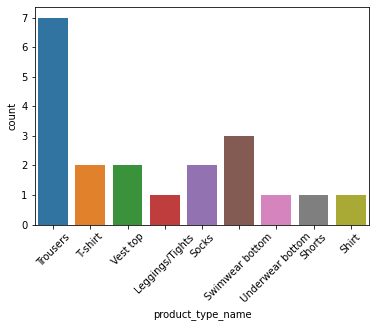

In [13]:
plt.xticks(rotation=45)
sns.countplot(x = top_20_articles.product_type_name);

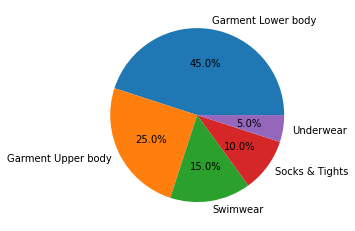

In [14]:
names, values = top_20_articles.product_group_name.value_counts().index, top_20_articles.product_group_name.value_counts().values
plt.pie(values, labels = names, autopct='%1.1f%%');

In [15]:
count_top_20_transaction_articles = transactions_article_ids_value_counts[transactions_article_ids_top_20[:10]].values
price_top_20_transaction_articles = transaction_2020[transaction_2020.article_id.isin(transactions_article_ids_top_20)]
price_top_20_transaction_articles = price_top_20_transaction_articles.groupby('article_id').agg({"price": "sum"}).sort_values('price',ascending=False)

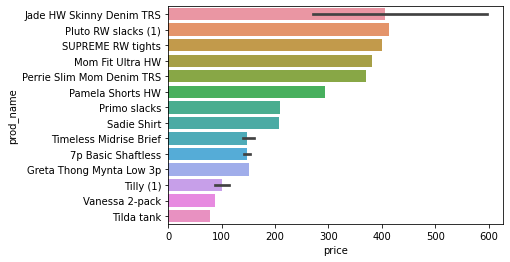

In [16]:
top_20_articles = price_top_20_transaction_articles.merge(articles_data, how = 'left', left_index = True, right_index = True)
sns.barplot(y = "prod_name", x = "price", data = top_20_articles);

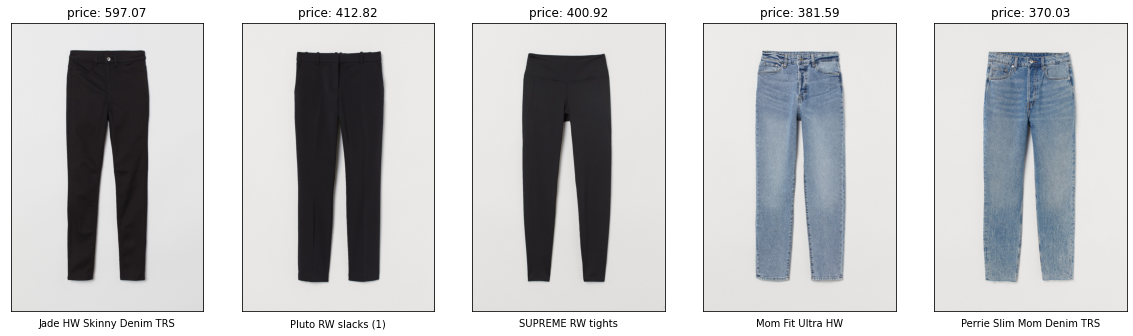

In [17]:
path = "../input/h-and-m-personalized-fashion-recommendations/images"
f, ax = plt.subplots(1, 5, figsize=(20,10))
i = 0
for idx, data in top_20_articles[:5].iterrows():
    file_name = "0" + str(idx) + ".jpg"
    dir_name = "0" + str(idx)[:2]
    image = mpimg.imread(path + "/" + dir_name + "/" + file_name)
    ax[i].imshow(image)
    ax[i].set_title(f'price: {data.price:.2f}')
    ax[i].set_xticks([], [])
    ax[i].set_yticks([], [])
    ax[i].grid(False)
    ax[i].set_xlabel(data['prod_name'], fontsize=10)
    i += 1
plt.show()

In [18]:
customers_data = cudf.read_csv("../input/h-and-m-personalized-fashion-recommendations/customers.csv")
customers_data['customer_id'] = customers_data['customer_id'].str[-16:].str.hex_to_int().astype('int64')
articles_data = pd.read_csv("../input/h-and-m-personalized-fashion-recommendations/articles.csv")
transactions_data_2020 = transaction_data[(transaction_data['year'] == 2020) & (transaction_data['month'] > 6) & (transaction_data['day'] > 20)]
transactions_customers_all_articles = transactions_data_2020.groupby('customer_id')['article_id'].unique().reset_index()

Articles that customers purchased together in single transcation: 
Customer id -9223343869995384291


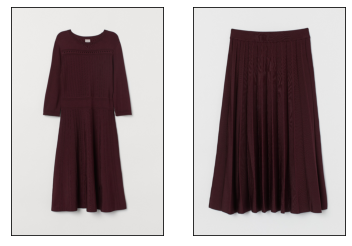

Customer id -9223279922255655589


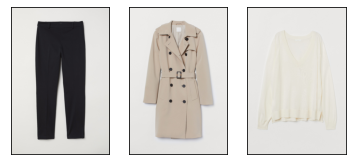

Customer id -9223251502792607675


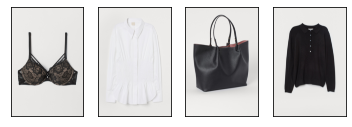

Customer id -9223020246005719412


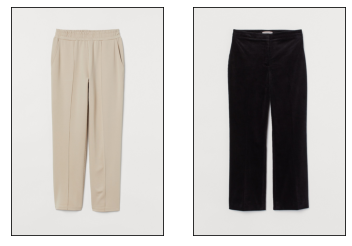

Customer id -9223014153176581410


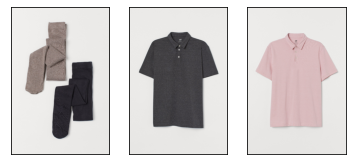

In [19]:
print("Articles that customers purchased together in single transcation: ")
for _, data in transcations_customers_all_articles.head(5).iterrows():
    print("Customer id", data['customer_id'])
    f, ax = plt.subplots(1, len(data['article_id']), figsize=(6, 6))
    path = "../input/h-and-m-personalized-fashion-recommendations/images"
    for i, article in enumerate(data['article_id']):
        file_name = "0" + str(article) + ".jpg"
        dir_name = "0" + str(article)[:2]
        image = mpimg.imread(path + "/" + dir_name + "/" + file_name)
        ax[i].imshow(image)
        ax[i].set_xticks([], [])
        ax[i].set_yticks([], [])
        ax[i].grid(False)
        i += 1
    plt.show()

In [20]:
top_customers_id = transaction_2020['customer_id'].value_counts().index.to_list()
top_10_customers = customers_data[customers_data['customer_id'].isin(top_customers_id[:10])]
top_10_customers

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
21280,-7809212811262987408,1.0,1.0,ACTIVE,Regularly,49.0,f2255b8174265ec97c29c5e7f23ee8e1d31b3bbe5ae34d...
358421,-4137963391721325,1.0,1.0,ACTIVE,Regularly,43.0,d51efa32b54a5f8c64d41ca12e7daa059e9a99ee31990f...
394603,742206143892321423,<NA>,<NA>,ACTIVE,NONE,28.0,ab724d6cb2340bd9c5294fd7f2811349f6509a27a8bc5c...
554973,-7444100056469161130,1.0,1.0,ACTIVE,Regularly,55.0,c2a77fe2ea57d47bda150b792d51c2bcb45dd5740644e4...
680471,2697331706436144899,1.0,1.0,ACTIVE,Regularly,33.0,2c170eef5d71c660d26538cc8ba016cf8a65274925d82a...
891429,3407358910964148684,1.0,1.0,ACTIVE,Regularly,61.0,c46e53a04e81a44fecaf0ec64ae353bfb3abc91f510e79...
969180,7398229172292340849,1.0,1.0,ACTIVE,Regularly,25.0,4acdec769091cb0bc94cfd3324843156dbc572a7281ae4...
976721,-6030179180003346623,1.0,1.0,ACTIVE,Regularly,43.0,ca6a33d3e52bd841e4be573a123ae2bcff3e6af65cc67a...
1018839,5854009424779598107,<NA>,<NA>,ACTIVE,NONE,31.0,67851f0456e7070c20c713fe0f47eb15bcbf2a59d13b79...
1331591,4111181464026910813,1.0,1.0,ACTIVE,Regularly,43.0,466cffb5c47f5aca3980a54be38daf7561133511705f4e...
